# **MARKET BASKET ANALYSIS**

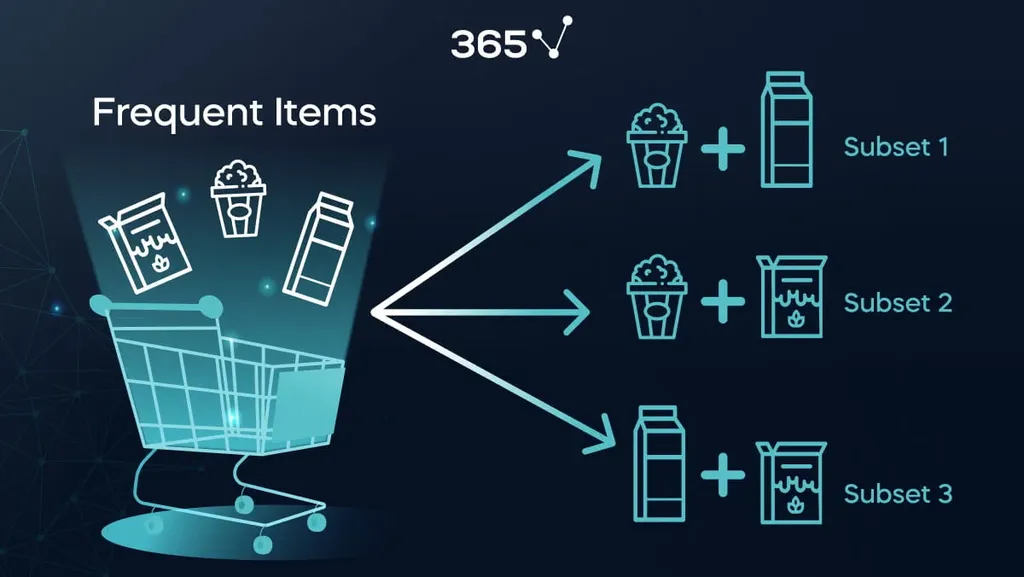



In [ ]:
# !pip install mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**2022**

##Étape 1 : Lecture des données

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/IKD_HOLDING/Market_Basket_Analysis/données/ACHAT_GROUPES.xlsx", sheet_name="Fichier_brute_2022")
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Nom,Prenom,Nom&Prénom,Prestation,Designation,NumTicket,Date,Heure,PVTTC,qte,Remise,PVHT,Type1,Nom_collaborateur,Taux_TVA,montant_tva,NumLigne,CA TTC,CA HT
0,BA,MME SOKHNA,BA MME SOKHNA,Glamour (Contouring + cils inclus),MAQUILLAGE SOPHISTIQUE (Contouring + cils inclus),7214,2022-01-01,20:34:48,10000,1,0,10000.0,Express visage,FATOU KINE,0,0.0,1,NaN,NaN
1,BA,MME SOKHNA,BA MME SOKHNA,Glamour (Contouring + cils inclus),MAQUILLAGE SOPHISTIQUE (Contouring + cils inclus),7214,2022-01-01,20:34:48,10000,1,0,10000.0,Express visage,MARIETOU,0,0.0,2,NaN,NaN
2,BA,MME SOKHNA,BA MME SOKHNA,Glamour (Contouring + cils inclus),MAQUILLAGE SOPHISTIQUE (Contouring + cils inclus),7214,2022-01-01,20:34:48,10000,1,0,10000.0,Express visage,Hawa.D,0,0.0,3,NaN,NaN
3,BAWE,CLEA,BAWE CLEA,Capsule + vernis permanent,CAPSULE + VERNIS PERMANENT,7199,2022-01-01,16:16:35,10000,1,0,10000.0,Prothésie,SOKHNAA,0,0.0,1,NaN,NaN
4,BAWE,CLEA,BAWE CLEA,Capsule + vernis permanent,CAPSULE + VERNIS PERMANENT,7199,2022-01-01,16:16:35,10000,1,0,10000.0,Prothésie,ARAME,0,0.0,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22786,DIOP,MARIEME,DIOP MARIEME,Simple Cil,POSE CILS SIMPLE,25,2020-05-17,12:58:14,5000,1,0,5000.0,Express visage,MARIEME DIOP,0,0.0,1,NaN,NaN
22787,DIOP,MARIEME,DIOP MARIEME,Simple Cil,POSE CILS SIMPLE,26,2020-05-17,13:09:41,5000,1,0,5000.0,Express visage,MARIEME DIOP,0,0.0,1,NaN,NaN
22788,DIOP,MARIEME,DIOP MARIEME,Simple Cil,POSE CILS SIMPLE,27,2020-05-17,13:16:03,5000,1,0,5000.0,Express visage,MARIEME DIOP,0,0.0,1,NaN,NaN
22789,DIOP,MARIEME,DIOP MARIEME,Simple Cil,POSE CILS SIMPLE,28,2020-05-17,13:22:25,5000,1,0,5000.0,Express visage,MARIEME DIOP,0,0.0,1,NaN,NaN


In [ ]:
# corr_df = df.corr(method="pearson")

# plt.figure(figsize=(8, 6))
# sns.heatmap(corr_df, annot=True)
# plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Étape 2 : Préparation des données pour l’analyse du panier de marché

In [ ]:
df["single_transaction"] = df["NumTicket"].astype(str)+"_"+df["Date"].astype(str)

df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Nom,Prenom,Nom&Prénom,Prestation,Designation,NumTicket,Date,Heure,PVTTC,qte,Remise,PVHT,Type1,Nom_collaborateur,Taux_TVA,montant_tva,NumLigne,CA TTC,CA HT,single_transaction
0,BA,MME SOKHNA,BA MME SOKHNA,Glamour (Contouring + cils inclus),MAQUILLAGE SOPHISTIQUE (Contouring + cils inclus),7214,2022-01-01,20:34:48,10000,1,0,10000.0,Express visage,FATOU KINE,0,0.0,1,NaN,NaN,7214_2022-01-01
1,BA,MME SOKHNA,BA MME SOKHNA,Glamour (Contouring + cils inclus),MAQUILLAGE SOPHISTIQUE (Contouring + cils inclus),7214,2022-01-01,20:34:48,10000,1,0,10000.0,Express visage,MARIETOU,0,0.0,2,NaN,NaN,7214_2022-01-01
2,BA,MME SOKHNA,BA MME SOKHNA,Glamour (Contouring + cils inclus),MAQUILLAGE SOPHISTIQUE (Contouring + cils inclus),7214,2022-01-01,20:34:48,10000,1,0,10000.0,Express visage,Hawa.D,0,0.0,3,NaN,NaN,7214_2022-01-01
3,BAWE,CLEA,BAWE CLEA,Capsule + vernis permanent,CAPSULE + VERNIS PERMANENT,7199,2022-01-01,16:16:35,10000,1,0,10000.0,Prothésie,SOKHNAA,0,0.0,1,NaN,NaN,7199_2022-01-01
4,BAWE,CLEA,BAWE CLEA,Capsule + vernis permanent,CAPSULE + VERNIS PERMANENT,7199,2022-01-01,16:16:35,10000,1,0,10000.0,Prothésie,ARAME,0,0.0,2,NaN,NaN,7199_2022-01-01


In [ ]:
df2 = pd.crosstab(df['single_transaction'], df['Designation'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df2.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Designation,GEL EFFET NATUREL,TATOUAGE MINI ENFANT,TRAITEMENT DE CHEVEUX,ABONNEMENT PEDICURE ET MANUCURE SIMPLE,Abonnement - TRAITEMENT DE CHEVEUX,Abonnement - ABONNEMENT ACNE,Abonnement - ABONNEMENT PEDICURE ET MANUCURE SIMPL,Abonnement - FORFAIT 1,Abonnement - LIFTING COLOMBIEN (FESSES) 6 SEANCES,Abonnement - LIFTING COLOMBIEN (SEINS) 6 SEANCES,...,lifting seins,lissage cheveu,pedicure simple,pose cil client,retrait tresses perruque,shampoing enfant,tatouage ongle,traitement 1,traitement cheveux 4 seances,tresses sur cheveux naturels moyennes
single_transaction,,,,,,,,,,,,,,,,,,,,,
10000_2022-07-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10001_2022-07-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10002_2022-07-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10003_2022-07-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10004_2022-07-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10005_2022-07-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10007_2022-07-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10008_2022-07-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10009_2022-07-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def encode(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res

basket_input = df2.applymap(encode)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
basket_input

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Designation,GEL EFFET NATUREL,TATOUAGE MINI ENFANT,TRAITEMENT DE CHEVEUX,ABONNEMENT PEDICURE ET MANUCURE SIMPLE,Abonnement - TRAITEMENT DE CHEVEUX,Abonnement - ABONNEMENT ACNE,Abonnement - ABONNEMENT PEDICURE ET MANUCURE SIMPL,Abonnement - FORFAIT 1,Abonnement - LIFTING COLOMBIEN (FESSES) 6 SEANCES,Abonnement - LIFTING COLOMBIEN (SEINS) 6 SEANCES,...,lifting seins,lissage cheveu,pedicure simple,pose cil client,retrait tresses perruque,shampoing enfant,tatouage ongle,traitement 1,traitement cheveux 4 seances,tresses sur cheveux naturels moyennes
single_transaction,,,,,,,,,,,,,,,,,,,,,
10000_2022-07-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10001_2022-07-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10002_2022-07-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10003_2022-07-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10004_2022-07-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997_2022-07-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998_2022-07-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9999_2022-07-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##Étape 3 : Créer l'algorithme Apriori pour l'analyse du panier de marché

In [ ]:
!pip install apyori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets = apriori(basket_input, min_support=0.001, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(DECORATION PAR DOIGT),( GEL EFFET NATUREL),0.011009,0.004743,0.001101,0.100000,21.085714,0.001049,1.105842,0.963179
1,( GEL EFFET NATUREL),(DECORATION PAR DOIGT),0.004743,0.011009,0.001101,0.232143,21.085714,0.001049,1.287988,0.957114
2,(VERNIS PERMANENT/VERNIS CAMALEON),( GEL EFFET NATUREL),0.045562,0.004743,0.001016,0.022305,4.703133,0.000800,1.017963,0.824963
3,( GEL EFFET NATUREL),(VERNIS PERMANENT/VERNIS CAMALEON),0.004743,0.045562,0.001016,0.214286,4.703133,0.000800,1.214739,0.791128
4,(BAIN D'HUILE (shampoing inclus)),(LETT KARAAW GROS),0.005081,0.017107,0.001016,0.200000,11.691089,0.000929,1.228616,0.919135


In [ ]:
"""Pour obtenir les combinaisons d'éléments les plus fréquentes dans l'ensemble de données, trions l'ensemble de données par support, confiance et ascenseur"""

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"Pour obtenir les combinaisons d'éléments les plus fréquentes dans l'ensemble de données, trions l'ensemble de données par support, confiance et ascenseur"

In [ ]:
rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(10)
# rules.sort_values(["lift", "confidence","support"],axis = 0, ascending = False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
231,(MANUCURE SIMPLE),(PEDICURE SIMPLE FEMME),0.031081,0.062923,0.018547,0.596730,9.483433,0.016591,2.323697,0.923248
230,(PEDICURE SIMPLE FEMME),(MANUCURE SIMPLE),0.062923,0.031081,0.018547,0.294751,9.483433,0.016591,1.373869,0.954621
103,(Cils simple-NM),(POSE CILS SIMPLE),0.032012,0.044207,0.016853,0.526455,11.908776,0.015438,2.018378,0.946322
102,(POSE CILS SIMPLE),(Cils simple-NM),0.044207,0.032012,0.016853,0.381226,11.908776,0.015438,1.564364,0.958396
99,(Cils simple-NM),(MAQUILLAGE SIMPLE ),0.032012,0.043699,0.013550,0.423280,9.686231,0.012151,1.658173,0.926417
98,(MAQUILLAGE SIMPLE ),(Cils simple-NM),0.043699,0.032012,0.013550,0.310078,9.686231,0.012151,1.403039,0.937739
67,(VERNIS PERMANENT/VERNIS CAMALEON),(CAPSULE + VERNIS PERMANENT),0.045562,0.076304,0.010925,0.239777,3.142382,0.007448,1.215033,0.714316
66,(CAPSULE + VERNIS PERMANENT),(VERNIS PERMANENT/VERNIS CAMALEON),0.076304,0.045562,0.010925,0.143174,3.142382,0.007448,1.113923,0.738089
372,(SHAMPOING ENFANT),(TRESSES + PERLES Enfant),0.027016,0.040058,0.010755,0.398119,9.938669,0.009673,1.594904,0.924355
373,(TRESSES + PERLES Enfant),(SHAMPOING ENFANT),0.040058,0.027016,0.010755,0.268499,9.938669,0.009673,1.330120,0.936913


In [ ]:
rules.to_excel("Analyse du panier de consommation.xlsx")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#**2023**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Étape 1 : Lecture des données

In [35]:
data = pd.read_excel("/content/drive/MyDrive/IKD_HOLDING/Market_Basket_Analysis/données/ACHAT_GROUPES.xlsx", sheet_name="Fichier_brute_2023")
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Etat,Date (arrivée/ dépôt),Arrivée cliente (en heure),Prénom + Nom,Téléphone,Spécificités,Date récup souhaitée,Statut,Catégories,Prestations,Tarif,Collaboratrice,Notation,Espèces,Wave,OM,CB,Tot encaissé,Commentaires
0,En attente,2023-06-14,11:01:00,KANE FATIMATA,771484216,NaN,NaN,NaN,Jabootu_TAARAL_4_à_15_ans,Firi,2000.0,Fatou Binetou Gaye,5,NaN,NaN,NaN,NaN,0.0,NaN
1,En attente,2023-06-14,11:01:00,KANE FATIMATA,771484216,NaN,NaN,NaN,Jabootu_TAARAL_4_à_15_ans,Bain d'huile enfant (shampoing inclus),6000.0,Fatou Binetou Gaye,5,NaN,NaN,NaN,NaN,0.0,NaN
2,En attente,2023-06-14,11:01:00,KANE FATIMATA,771484216,NaN,NaN,NaN,Soins_des_cheveux,Brushing cheveux naturels,5000.0,Fatou Binetou Gaye,5,NaN,NaN,NaN,NaN,0.0,NaN
3,En attente,2023-06-14,14:15:00,DIALLO fatoumata binetou,780111850,NaN,NaN,NaN,Make_Up,Maquillage simple,5000.0,Fatou Binetou Gaye,5,NaN,NaN,NaN,NaN,0.0,NaN
4,En attente,2023-06-14,14:15:00,DIALLO fatoumata binetou,780111850,NaN,NaN,NaN,Cérémonie,Foulard simple,3000.0,Fatou Binetou Gaye,5,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5439,Payé,2023-12-31,17:55:00,DIALLO MME MARIAMA,773482792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5000,NaN,NaN,NaN,5000.0,NaN
5440,Payé,2023-12-31,18:44:00,SYLLA FATOU KINE,781714846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,13000,NaN,NaN,NaN,13000.0,NaN
5441,Payé,2023-12-31,18:50:00,MME LY KHADY,781851151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,30000.0,30000.0,NaN
5442,Payé,2023-12-31,19:05:00,MOYALBAYE BRIA,771485048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,10000,NaN,NaN,NaN,10000.0,NaN


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Étape 2 : Préparation des données pour l’analyse du panier de consommation

In [36]:
data["single_transaction"] = data["Arrivée cliente (en heure)"].astype(str)+ "_"+ data["Date (arrivée/ dépôt)"].astype(str)

data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Etat,Date (arrivée/ dépôt),Arrivée cliente (en heure),Prénom + Nom,Téléphone,Spécificités,Date récup souhaitée,Statut,Catégories,Prestations,Tarif,Collaboratrice,Notation,Espèces,Wave,OM,CB,Tot encaissé,Commentaires,single_transaction
0,En attente,2023-06-14,11:01:00,KANE FATIMATA,771484216,NaN,NaN,NaN,Jabootu_TAARAL_4_à_15_ans,Firi,2000.0,Fatou Binetou Gaye,5,NaN,NaN,NaN,NaN,0.0,NaN,11:01:00_2023-06-14
1,En attente,2023-06-14,11:01:00,KANE FATIMATA,771484216,NaN,NaN,NaN,Jabootu_TAARAL_4_à_15_ans,Bain d'huile enfant (shampoing inclus),6000.0,Fatou Binetou Gaye,5,NaN,NaN,NaN,NaN,0.0,NaN,11:01:00_2023-06-14
2,En attente,2023-06-14,11:01:00,KANE FATIMATA,771484216,NaN,NaN,NaN,Soins_des_cheveux,Brushing cheveux naturels,5000.0,Fatou Binetou Gaye,5,NaN,NaN,NaN,NaN,0.0,NaN,11:01:00_2023-06-14
3,En attente,2023-06-14,14:15:00,DIALLO fatoumata binetou,780111850,NaN,NaN,NaN,Make_Up,Maquillage simple,5000.0,Fatou Binetou Gaye,5,NaN,NaN,NaN,NaN,0.0,NaN,14:15:00_2023-06-14
4,En attente,2023-06-14,14:15:00,DIALLO fatoumata binetou,780111850,NaN,NaN,NaN,Cérémonie,Foulard simple,3000.0,Fatou Binetou Gaye,5,NaN,NaN,NaN,NaN,0.0,NaN,14:15:00_2023-06-14


In [37]:
data2 = pd.crosstab(data['single_transaction'], data['Prestations'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
data2.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Prestations,8000,,**,Bain d'huile (shampoing inclus),Bain d'huile enfant (shampoing inclus),Boucles tissage tire bouchon,Brushing cheveux nappy ou perruques,Brushing cheveux nappy ou perruques + Lissage,Brushing cheveux naturels,Brushing cheveux naturels + Lissage,...,Tresses avec mèches grosses,Tresses avec mèches grosses Enfants,Tresses avec mèches moyennes Enfants,Twist mèches adultes,Twist/Life rajout,Twist/Life rajout Enfants,Vernis Gel,Vernis permanent/vernis cameleon,Vernis simple/vernis halal,henné pieds
single_transaction,,,,,,,,,,,,,,,,,,,,,
00:00:00_2023-06-20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00:00:00_2023-06-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00:00:00_2023-07-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00:00:00_2023-07-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00:00:00_2023-07-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00:00:00_2023-07-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00:00:00_2023-07-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00:00:00_2023-10-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
00:00:00_2023-11-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
def encode(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res

basket_inputt = data2.applymap(encode)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
basket_inputt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Prestations,8000,,**,Bain d'huile (shampoing inclus),Bain d'huile enfant (shampoing inclus),Boucles tissage tire bouchon,Brushing cheveux nappy ou perruques,Brushing cheveux nappy ou perruques + Lissage,Brushing cheveux naturels,Brushing cheveux naturels + Lissage,...,Tresses avec mèches grosses,Tresses avec mèches grosses Enfants,Tresses avec mèches moyennes Enfants,Twist mèches adultes,Twist/Life rajout,Twist/Life rajout Enfants,Vernis Gel,Vernis permanent/vernis cameleon,Vernis simple/vernis halal,henné pieds
single_transaction,,,,,,,,,,,,,,,,,,,,,
00:00:00_2023-06-20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00:00:00_2023-06-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00:00:00_2023-07-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00:00:00_2023-07-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00:00:00_2023-07-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22:29:00_2023-06-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22:45:00_2023-06-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22:52:00_2023-06-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##Étape 3 : Créer l'algorithme Apriori pour l'analyse du panier de marché

In [41]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
frequent_itemsets = apriori(basket_inputt, min_support=0.001, use_colnames=True)

rules2023 = association_rules(frequent_itemsets, metric="lift")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [50]:
rules2023.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bain d'huile (shampoing inclus)),(Brushing cheveux naturels + Lissage),0.024096,0.010919,0.002259,0.093750,8.586207,0.001996,1.091400,0.905350
1,(Brushing cheveux naturels + Lissage),(Bain d'huile (shampoing inclus)),0.010919,0.024096,0.002259,0.206897,8.586207,0.001996,1.230487,0.893288
2,(Bain d'huile (shampoing inclus)),(Epilation aisselles),0.024096,0.011672,0.001130,0.046875,4.016129,0.000848,1.036935,0.769547
3,(Epilation aisselles),(Bain d'huile (shampoing inclus)),0.011672,0.024096,0.001130,0.096774,4.016129,0.000848,1.080465,0.759873
4,"(Firi tresses simples (raw,mèches,etc))",(Bain d'huile (shampoing inclus)),0.025979,0.024096,0.003389,0.130435,5.413043,0.002763,1.122289,0.837006


In [51]:
"""Pour obtenir les combinaisons d'éléments les plus fréquentes dans l'ensemble de données, trions l'ensemble de données par support, confiance et ascenseur"""

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"Pour obtenir les combinaisons d'éléments les plus fréquentes dans l'ensemble de données, trions l'ensemble de données par support, confiance et ascenseur"

In [52]:
rules2023.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(10)
# rules2023.sort_values(["lift", "confidence","support"],axis = 0, ascending = False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
160,(Manucure simple),(Pédicure simple),0.042922,0.106551,0.027861,0.649123,6.092121,0.023288,2.546329,0.873339
161,(Pédicure simple),(Manucure simple),0.106551,0.042922,0.027861,0.261484,6.092121,0.023288,1.295948,0.935536
119,(Firi tresses simples (lett karaw gros)),(Shampoing classic),0.043298,0.128012,0.024849,0.573913,4.483274,0.019307,2.046502,0.812112
118,(Shampoing classic),(Firi tresses simples (lett karaw gros)),0.128012,0.043298,0.024849,0.194118,4.483274,0.019307,1.187148,0.891009
139,(Shampoing),(Lett karaw (perles incluses)),0.064759,0.084337,0.023720,0.366279,4.343023,0.018258,1.444899,0.823045
138,(Lett karaw (perles incluses)),(Shampoing),0.084337,0.064759,0.023720,0.281250,4.343023,0.018258,1.301205,0.840643
110,(Firi),(Shampoing),0.030873,0.064759,0.021837,0.707317,10.922292,0.019838,3.195407,0.937384
111,(Shampoing),(Firi),0.064759,0.030873,0.021837,0.337209,10.922292,0.019838,1.462191,0.971348
143,(Lett karaw Grosses),(Shampoing classic),0.047440,0.128012,0.021461,0.452381,3.533894,0.015388,1.592326,0.752736
145,(Lett karaw Moyennes),(Shampoing classic),0.053840,0.128012,0.021461,0.398601,3.113780,0.014569,1.449933,0.717476


In [ ]:
rules2023.to_excel("Analyse du panier de consommation 2023.xlsx")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
